# 3.6 Converting Categorical Variables to Quantitative Variables

We have seen how quantitative variables can be converted to categorical variables using the `cut` function. What about the other way around? Can categorical variables be converted to quantitative ones?

In [1]:
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## Converting Categorical Variables to Quantitative Variables

Binary categorical variables (categorical variables with exactly two categories) can be converted into quantitative variables by coding one category as 1 and the other category as 0. (In fact, the **survived** column in the Titanic data set has already been coded this way.) The easiest way to do this is to create a boolean mask. For example, to convert **gender** to a quantitative variable **female**, which is 1 if the passenger was female and 0 otherwise, we can do the following:

In [2]:
df_titanic["female"] = 1 * (df_titanic["gender"] == "female")
df_titanic["female"]

0       0
1       0
2       0
3       1
4       1
       ..
2202    0
2203    0
2204    0
2205    0
2206    0
Name: female, Length: 2207, dtype: int64

Multiplying by 1 converts the `Series` of booleans to a `Series` of integers.

Now we can manipulate this new variable as we would any other quantitative variable. For example, the sum would tell us how many passengers were female, while the mean would tell us the _proportion_ of passengers who were female.

In [3]:
df_titanic["female"].sum(), df_titanic["female"].mean()

(489, 0.2215677390122338)

What do we do about a categorical variable with more than two categories, like `embarked`, which has four categories? In general, a categorical variable with $K$ categories can be converted into $K$ separate 0/1 variables, or **dummy variables**. Each of the $K$ dummy variables is an indicator for one of the $K$ categories. That is, a dummy variable is 1 if the observation fell into its particular category and 0 otherwise.

Although it is not difficult to create dummy variables manually, the easiest way to create them is the `get_dummies()` function in `pandas`.

In [4]:
pd.get_dummies(df_titanic["embarked"])

,B,C,Q,S
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
2202,1,0,0,0
2203,0,0,0,1
2204,0,0,0,1
2205,0,0,0,1


Since every observation is in exactly one category, each row contains exactly one 1; the rest of the values in each row are 0s.

We can call `get_dummies` on a `DataFrame` to encode multiple categorical variables at once. `pandas` will only dummy-encode the variables it deems as categorical, leaving the quantitative variables alone. If there are any categorical variables that are represented in the `DataFrame` using numeric types, they must be cast explicitly to a categorical type, such as `str`.  `pandas` will also automatically prepend the variable name to all dummy variables, to prevent collisions between column names in the final `DataFrame`.

In [5]:
# Pass all variables to get_dummies, dropping ones that are "other" types
df_titanic_quant = pd.get_dummies(
    df_titanic.drop(["name", "ticketno"], axis=1)
)
df_titanic_quant

,age,fare,survived,female,gender_female,gender_male,class_1st,class_2nd,class_3rd,class_deck crew,...,country_South Africa,country_Spain,country_Sweden,country_Switzerland,country_Syria,country_Turkey,country_United States,country_Uruguay,country_Wales,country_Yugoslavia
0,42.0,7.11,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,13.0,20.05,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,16.0,20.05,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,39.0,20.05,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,16.0,7.13,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,41.0,NaN,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2203,40.0,NaN,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2204,32.0,NaN,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2205,20.0,NaN,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Notice that categorical variables, like `class`, were converted to dummy variables with names like `class_1st`, `class_2nd` and `class_3rd`, while quantitative variables, like `age`, were left alone.

# Exercises

Exercises 1-3 ask you to work with the Ames housing data set (`https://dlsun.github.io/pods/data/AmesHousing.txt`).

In [8]:
ames = pd.read_table(data_dir + "AmesHousing.txt")
ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


1\. The **Neighborhood** variable in this data set is categorical. Convert it into $K$ quantitative variables. What is $K$ in this case?

How would you use the quantitative variables that you just created to calculate the distribution of houses across the neighborhoods?

In [12]:
ames_neigh = pd.get_dummies(ames["Neighborhood"])
ames_neigh

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**K in this case is 28. You could find the mean of each column (down the rows) to calculate the distribution of houses across the neighborhoods.**

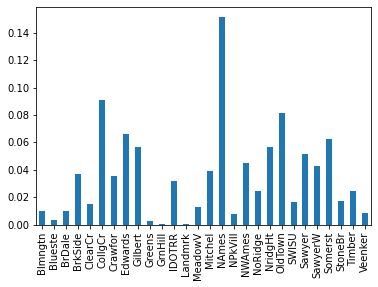

In [32]:
ames_neigh.mean(axis=0).plot.bar()

2\. How would you use the quantitative variables that you just created, along with the **SalePrice** column, to calculate the average price of a home in each neighborhood?

In [44]:
ames_neigh.multiply(ames["SalePrice"], axis=0).sum() / ames_neigh.sum(axis=0)

Blmngtn    196661.678571
Blueste    143590.000000
BrDale     105608.333333
BrkSide    124756.250000
ClearCr    208662.090909
CollgCr    201803.434457
Crawfor    207550.834951
Edwards    130843.381443
Gilbert    190646.575758
Greens     193531.250000
GrnHill    280000.000000
IDOTRR     103752.903226
Landmrk    137000.000000
MeadowV     95756.486486
Mitchel    162226.631579
NAmes      145097.349887
NPkVill    140710.869565
NWAmes     188406.908397
NoRidge    330319.126761
NridgHt    322018.265060
OldTown    123991.891213
SWISU      135071.937500
Sawyer     136751.152318
SawyerW    184070.184000
Somerst    229707.324176
StoneBr    324229.196078
Timber     246599.541667
Veenker    248314.583333
dtype: float64

3\. Suppose you convert the **Neighborhood** and **Bldg Type** variables to quantitative variables. How many new quantitative variables will you have? What is the value of the sum across each row of these new quantitative variables?

In [21]:
ames_neigh_bldg = pd.get_dummies(ames[["Neighborhood", "Bldg Type"]])
ames_neigh_bldg

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**I will have 33 new quantitative variables.**

In [45]:
ames_neigh_bldg.sum(axis=0)

Neighborhood_Blmngtn      28
Neighborhood_Blueste      10
Neighborhood_BrDale       30
Neighborhood_BrkSide     108
Neighborhood_ClearCr      44
Neighborhood_CollgCr     267
Neighborhood_Crawfor     103
Neighborhood_Edwards     194
Neighborhood_Gilbert     165
Neighborhood_Greens        8
Neighborhood_GrnHill       2
Neighborhood_IDOTRR       93
Neighborhood_Landmrk       1
Neighborhood_MeadowV      37
Neighborhood_Mitchel     114
Neighborhood_NAmes       443
Neighborhood_NPkVill      23
Neighborhood_NWAmes      131
Neighborhood_NoRidge      71
Neighborhood_NridgHt     166
Neighborhood_OldTown     239
Neighborhood_SWISU        48
Neighborhood_Sawyer      151
Neighborhood_SawyerW     125
Neighborhood_Somerst     182
Neighborhood_StoneBr      51
Neighborhood_Timber       72
Neighborhood_Veenker      24
Bldg Type_1Fam          2425
Bldg Type_2fmCon          62
Bldg Type_Duplex         109
Bldg Type_Twnhs          101
Bldg Type_TwnhsE         233
dtype: int64